In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


**EDA**

In [3]:
df = pd.read_csv('data.csv')
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
print(df.dtypes) # типы переменных в данных
print(df.shape) # размерность данных
df.info

Unnamed: 0          int64
ID                  int64
Name               object
Age                 int64
Photo              object
                   ...   
GKHandling        float64
GKKicking         float64
GKPositioning     float64
GKReflexes        float64
Release Clause     object
Length: 89, dtype: object
(18207, 89)


<bound method DataFrame.info of        Unnamed: 0      ID  ... GKReflexes  Release Clause
0               0  158023  ...        8.0         €226.5M
1               1   20801  ...       11.0         €127.1M
2               2  190871  ...       11.0         €228.1M
3               3  193080  ...       94.0         €138.6M
4               4  192985  ...       13.0         €196.4M
...           ...     ...  ...        ...             ...
18202       18202  238813  ...        9.0           €143K
18203       18203  243165  ...       12.0           €113K
18204       18204  241638  ...       13.0           €165K
18205       18205  246268  ...        9.0           €143K
18206       18206  246269  ...        9.0           €165K

[18207 rows x 89 columns]>

In [5]:
df.dropna()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause


In [6]:
# Preprocessing
df['Wage'] = df['Wage'].str.replace('€','')
df['Wage'] = df['Wage'].str.replace('K','')

In [7]:
df['Wage']

0        565
1        405
2        290
3        260
4        355
        ... 
18202      1
18203      1
18204      1
18205      1
18206      1
Name: Wage, Length: 18207, dtype: object

# Part 1

*Выберете переменные которые решили взять в качестве признаков для кластеризации. Объясните почему именно эти признаки взяли для кластеризации*

Будем исследовать, как зависит заработная плата игрока*(Wage)* от его рейтинга *(Potential - Maximum Overall rating expected to be reached by a player in the top of his career rated between 1-99.)* 



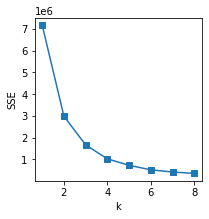

In [ ]:
# Выделим вектор признаков Х
X = df.loc[:,['Potential','Wage']]
# метод локтя

SSE = [] # Сумма квадратов ошибок для каждого результата

for k in range(1,9):
    kmeans = KMeans(n_clusters = k) # построить кластер
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)
 
plt.plot(range(1,9), SSE, marker='s');
plt.xlabel('k')
plt.ylabel('SSE');
plt.show()

По графику нетрудно видеть, что пяти кластеров будет достаточно(сумма квадратов ошибок перестает практически меняться)

In [ ]:


# Создаем модель кластеризации
kmeans = KMeans(n_clusters=5)

# обучим нашу модель
kmeans.fit(X)

# выведем полученные метки кластеров, которые вычислил алгоритм

Y_pred = kmeans.labels_
Y_pred

array([3, 3, 3, ..., 0, 0, 0], dtype=int32)

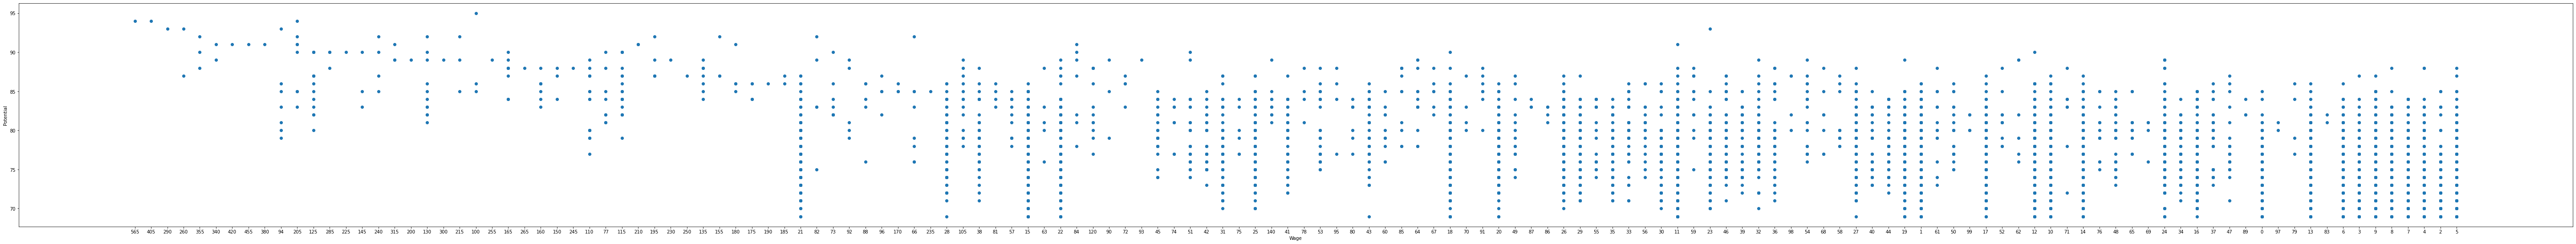

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(100,9))
plt.scatter(df['Wage'],df['Potential'])
plt.xlabel('Wage')
plt.ylabel('Potential')
plt.show()

In [ ]:
X['cluster'] = Y_pred 
df['cluster'] = X['cluster']
X[X['cluster']==0]

,Potential,Wage,cluster
76,86,21,0
109,85,15,0
112,87,22,0
114,88,22,0
166,90,18,0
...,...,...,...
6243,80,9,0
6244,69,14,0
6245,74,19,0
6246,72,9,0


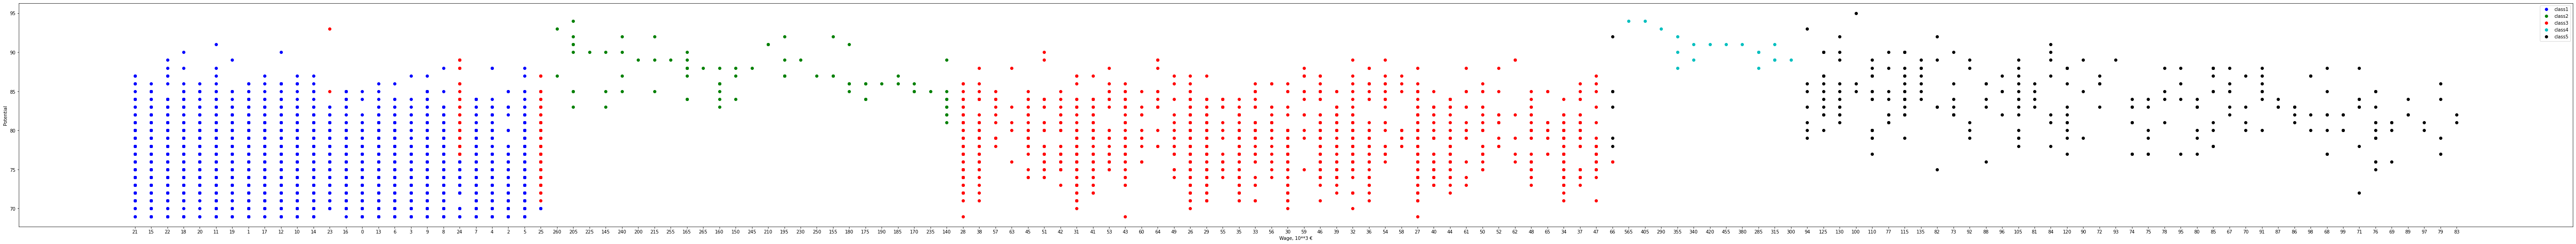

In [ ]:
plt.figure(figsize=(100,9))
plt.plot(X[X['cluster']==0]['Wage'], X[X['cluster']==0]['Potential'], 'bo', label='class1')

plt.plot(X[X['cluster']==1]['Wage'], X[X['cluster']==1]['Potential'], 'go', label='class2')

plt.plot(X[X['cluster']==2]['Wage'], X[X['cluster']==2]['Potential'], 'ro', label='class3')

plt.plot(X[X['cluster']==3]['Wage'], X[X['cluster']==3]['Potential'], 'co', label='class4')

plt.plot(X[X['cluster']==4]['Wage'], X[X['cluster']==4]['Potential'], 'ko', label='class5')
plt.xlabel('Wage, 10**3 €')
plt.ylabel('Potential')
plt.legend(loc=0)

plt.show()

*Сделайте вывод чем похожи игроки внутри класеров или по какому принципу организовались данные кластеры.*


Все игроки в одном из кластеров имеют схожий рейтинг и заработную плату.

# Part 2



In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# матрица расстояний
X = df.loc[:,['Potential','Wage']]
Z = linkage(X, 'ward')


In [ ]:

# визуализация дендрограмы
fig = plt.figure(figsize=(10, 10))
dn = dendrogram(Z)

In [10]:
from scipy.cluster.hierarchy import linkage

Z = linkage(X, method='average', metric='euclidean')
Z[0]

array([20., 28.,  0.,  2.])

In [21]:
from scipy.cluster.hierarchy import fcluster

# fcluster - метод разбиения на кластеры
# принимает на вход: матрицу расстояний
# критерий разделения на кластеры
label = fcluster(Z, 100, criterion='distance')
# label = fcluster(Z, n_clusters, criterion='n_clusters')

np.unique(label)
# обратите внимание что в отличии kmeans или AgglomerativeClustering
# нумерация кластеров с 1

array([1, 2, 3, 4, 5], dtype=int32)

In [22]:
df['pred_group'] = label
label

array([5, 4, 3, ..., 1, 1, 1], dtype=int32)

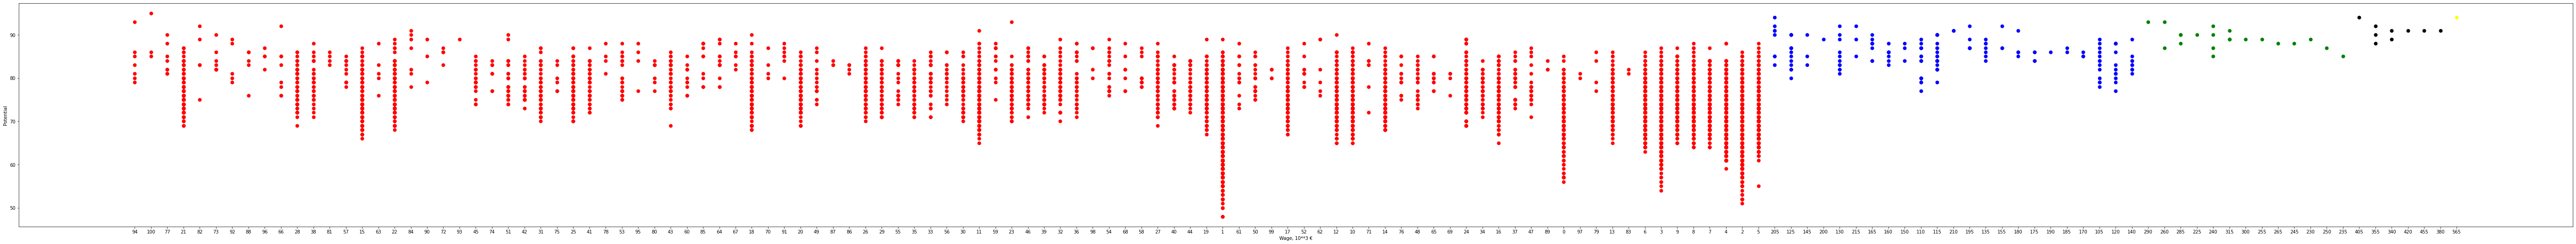

In [26]:
from matplotlib import pyplot as plt
plt.figure(figsize=(100,9))
plt.scatter(df.loc[label==1, 'Wage'], df.loc[label==1, 'Potential'], s=50, marker='o', color='red')
plt.scatter(df.loc[label==2, 'Wage'], df.loc[label==2, 'Potential'], s=50, marker='o', color='blue')
plt.scatter(df.loc[label==3, 'Wage'], df.loc[label==3, 'Potential'], s=50, marker='o', color='green')
plt.scatter(df.loc[label==4, 'Wage'], df.loc[label==4, 'Potential'], s=50, marker='o', color='black')
plt.scatter(df.loc[label==5, 'Wage'], df.loc[label==5, 'Potential'], s=50, marker='o', color='yellow')
plt.xlabel('Wage, 10**3 €')
plt.ylabel('Potential')
plt.show()